# Práctica 0: Python
## Agustíon Jofré Millet
Se realiza el cálculo de min función por medio de la integral de Monte Carlo. El resultado obtenido con un total de 10000 puntos el resultado varia, con respecto a la llamada a la función de math. Dependiendo de los puntos de debajo de la curva, generados de forma aleatoria, el resultado también cambia. 

Respecto a los tiempos generados , la función vectorizada es 4 veces mas rápida que la función con bucle for.

Integra_mc:
numero de puntos debajo de la curva: 3311
Num. debajo / Num.total: 0.3311
Area rectangulo: 648.0
Tiempo (ms):  70.41501998901367
214.5528
------------------------------------------
Integrate.quad:
(216.0, 2.398081733190338e-12)
------------------------------------------
Integra_mc_vect
numero de puntos debajo de la curva: 3319
Num. debajo / Num.total: 0.3319
Area rectangulo: 648.0
Tiempo (ms):  20.8892822265625
215.0712


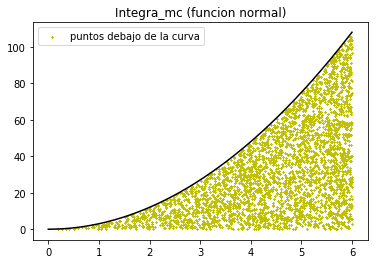

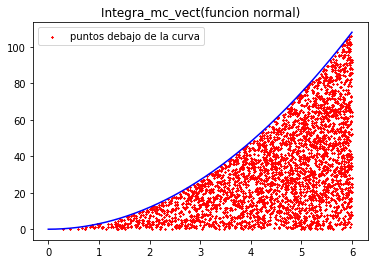

In [59]:
import numpy as np
from scipy import integrate
import math
import matplotlib.pyplot as plt
import time as tm


def integra_mc(fun, a, b, num_puntos=10000):
    #inicio del tiempo
    start = tm.time()
    
    #x = np.arange(a, b, 0.01) #num entre a y b
    x = np.linspace(a, b, num_puntos)
    y = fun(x)
    f_max = max(y)
    
    debajo = 0
    x_debajo = []
    y_debajo = []
    #generamos pountos aleatorios, las x entre a y b
    #puntos entre 0 y b-a y las y entre 0 y f_max
    #sumamos los puntos de denajo
    for i in range(0, num_puntos):  
        x_rand = np.random.uniform(b,a)
        y_rand = np.random.uniform(f_max, 0) 
        if y_rand < fun(x_rand) :
            x_debajo.append(x_rand)
            y_debajo.append(y_rand)
            debajo += 1
    
    print("numero de puntos debajo de la curva:", debajo)
    print("Num. debajo / Num.total:", debajo/num_puntos)
    print("Area rectangulo:", f_max*(b-a))
    
    
    #dibujamos la figura
    
    plt.figure()
    plt.plot(x, y, c = "k")
    plt.scatter(x_debajo, y_debajo, 2 ,marker='x',c = "y", label='puntos debajo de la curva')
    plt.title('Integra_mc (funcion normal)')
    plt.legend()
    
    #fin tiempo
    end = tm.time()
    
    print ("Tiempo (ms): ", 1000*(end - start) )
    
    return f_max*(b-a) * debajo/num_puntos


#-----------------------------------------------------------------------

def integra_mc_vect(fun, a, b, num_puntos=10000):
    
    #inicio del tiempo
    start = tm.time()
    
    #x = np.arange(a, b, 0.01) #num entre a y b
    x = np.linspace(a, b, num_puntos)
    y = fun(x)
    f_max = max(y)
    
    
    #generamos pountos aleatorios, las x entre a y b
    #puntos entre 0 y b-a y las y entre 0 y f_max
    
    x_rand = np.random.uniform(a, b, num_puntos)
    y_rand = np.random.uniform(0, f_max, num_puntos)
    
    #puntos debajo de la curva
    debajo = np.where(y_rand < fun(x_rand))
    
    print("numero de puntos debajo de la curva:", len(debajo[0]))
    print("Num. debajo / Num.total:", len(debajo[0]) / num_puntos)
    print("Area rectangulo:", f_max*(b-a))
    
    
    #dibijamos la figura
    
    plt.figure()
    plt.plot(x, y, c = "b")
    plt.scatter(x_rand[debajo], y_rand[debajo], 2 ,marker='x',c = "r", label='puntos debajo de la curva')
    plt.title('Integra_mc_vect(funcion normal)')
    plt.legend()
    
    #fin tiempo
    end = tm.time()
    
    print ("Tiempo (ms): ", 1000*(end - start) )
    
    return f_max*(b-a) * len(debajo[0])/num_puntos 

#------------------------------------------------------------------

def mi_fun (x):
    return((3)*(x**2))

#programa principal
  
print("Integra_mc:")
print (integra_mc(mi_fun,0, 6 ))

print ("------------------------------------------")

print("Integrate.quad:")
print(integrate.quad(mi_fun, 0, 6))

print ("------------------------------------------")
print("Integra_mc_vect")
print (integra_mc_vect(mi_fun,0, 6))


    